<a href="https://colab.research.google.com/github/solislemuslab/colonization-squid/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install PyDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [4]:
data_path = '/content/gdrive/My Drive/squid/'
squid = pd.read_excel(data_path+'Dataset-S1.xlsx')
squid.shape

(3983, 31)

In [9]:
categories = sorted(squid.Category.unique())
categories

[1, 2, 3, 4, 5, 6]

# Target Value

In [ ]:
y_counts = squid.Category.value_counts()
y_counts

5    1911
4     967
2     455
6     380
1     155
3     115
Name: Category, dtype: int64

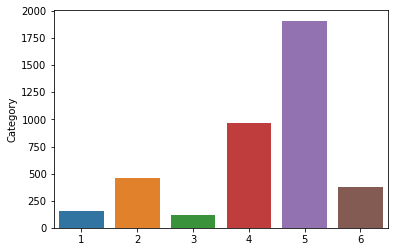

In [ ]:
sns.barplot(x=y_counts.index, y=y_counts)

# Missing Value

In [ ]:
squid.columns[squid.isnull().any()]

Index(['Gene'], dtype='object')

In [ ]:
gene_missing_cnt = squid.Gene.isnull().sum()
print(f'The missing count for gene col is {gene_missing_cnt} and the missing ratio is {gene_missing_cnt/squid.shape[0]*100}%.')

The missing count for gene col is 163 and the missing ratio is 4.092392668842581%.


In [ ]:
squid.Gene.value_counts()

--       1835
pilM        1
tfoX2       1
rimK        1
dcuA        1
         ... 
metK        1
aat         1
yqiA        1
mshP2       1
yihI        1
Name: Gene, Length: 1986, dtype: int64

# Difference between categories

In [5]:
label_encoder = LabelEncoder()
squid['Chromosome_le'] = label_encoder.fit_transform(squid['Chromosome'])
squid['Chromosome_le'].value_counts()

0    2736
1    1190
2      57
Name: Chromosome_le, dtype: int64

In [10]:
squid_by_cat = []
for cat in categories: ## seperate the dataset according to its target
  part = squid[squid['Category'] == cat]
  squid_by_cat.append(part)

In [25]:
def cat_diff_by_col(df_list=squid_by_cat, col=None, kde=False, title=" by Category"):
  for cat in categories:
    df = df_list[cat-1]
    sns.distplot(a=df[col], label=cat, kde=kde)
  plt.title(title)
  plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


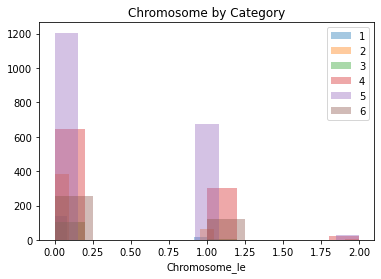

In [16]:
cat_diff_by_col(col='Chromosome_le', title="Chromosome by Category")

It seems that the column "Chromosome" does not play any important rule in distinguishing categories.

In [35]:
drop_list = ['ID','Chromosome','Coordinate','Locus_Tag','Gene','Annotation']

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


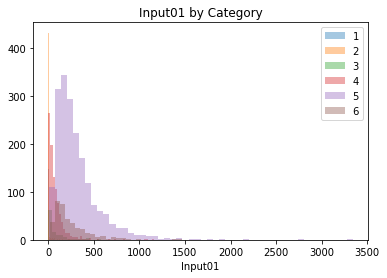

In [18]:
cat_diff_by_col(col='Input01', kde=False, title="Input01 by Category")

Some extreme values in this column. 

In [36]:
squid_by_cat_input_cutoff = []
for df in squid_by_cat:
  df2 = df.copy()
  df2.drop(drop_list, axis=1, inplace=True)
  df2 = df2.applymap(lambda x: 1500 if x > 1500 else x)
  # df2['Input01'] = df2['Input01'].apply(lambda x: 1500 if x > 1500 else x)
  # df2['LBS01'] = df2['LBS01'].apply(lambda x: 1500 if x > 1500 else x)
  squid_by_cat_input_cutoff.append(df2)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


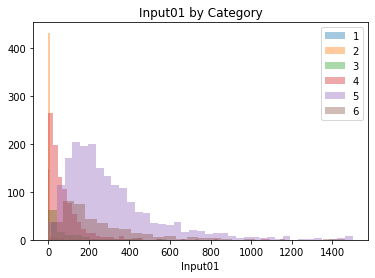

In [28]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Input01', kde=False, title="Input01 by Category")

There seems to be fine difference between category 2, 4, 5. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


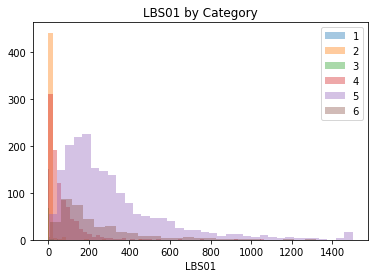

In [31]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='LBS01', title="LBS01 by Category")

Very similar to 'Input01'. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


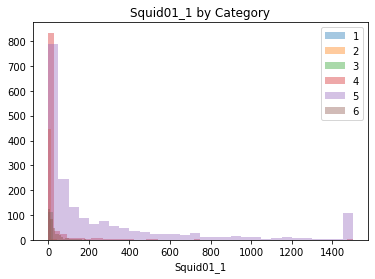

In [37]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid01_1', title="Squid01_1 by Category")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


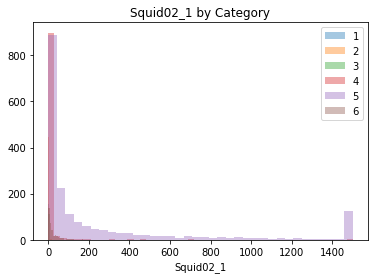

In [38]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid02_1', title="Squid02_1 by Category")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


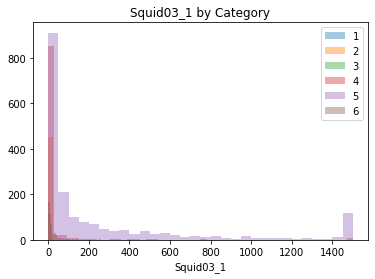

In [39]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid03_1', title="Squid03_1 by Category")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


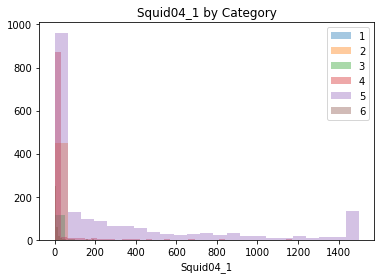

In [40]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid04_1', title="Squid04_1 by Category")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


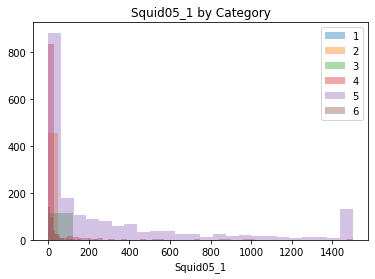

In [41]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid05_1', title="Squid05_1 by Category")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


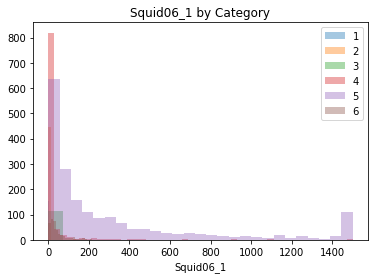

In [42]:
cat_diff_by_col(df_list=squid_by_cat_input_cutoff, col='Squid06_1', title="Squid06_1 by Category")

The difference is not very clear.

In [55]:
color_list = ['dodgerblue','orange','green','red','violet','brown']

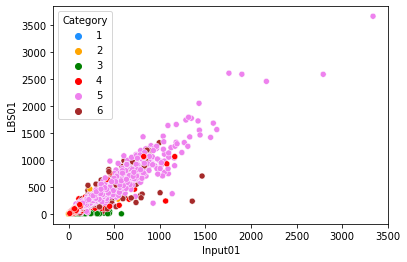

In [54]:
g = sns.scatterplot(x=squid['Input01'], y=squid['LBS01'], hue=squid['Category'],\
          palette=color_list, legend='full')
# g.set(xscale='log', yscale='log')

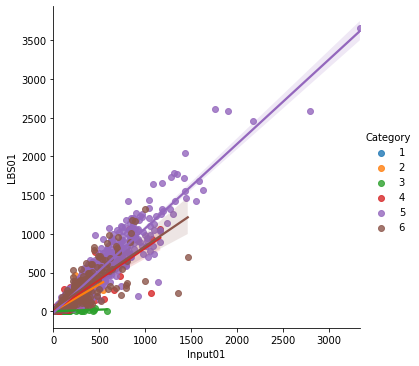

In [50]:
sns.lmplot(x="Input01", y="LBS01", hue="Category", data=squid)

We verify the rough linear relationship between 'Input01' and 'LBS01'.

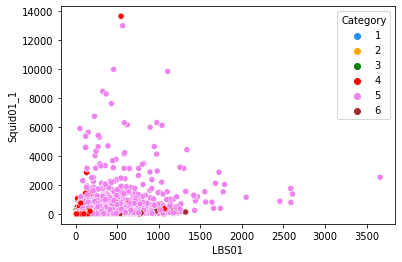

In [56]:
g = sns.scatterplot(x=squid['LBS01'], y=squid['Squid01_1'], hue=squid['Category'],\
          palette=color_list, legend='full')

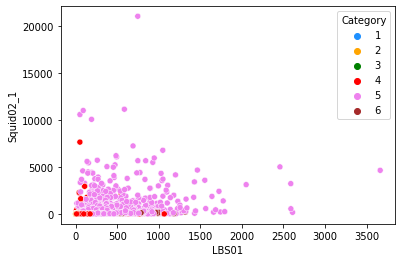

In [57]:
g = sns.scatterplot(x=squid['LBS01'], y=squid['Squid02_1'], hue=squid['Category'],\
          palette=color_list, legend='full')

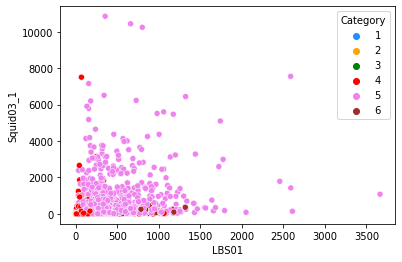

In [58]:
g = sns.scatterplot(x=squid['LBS01'], y=squid['Squid03_1'], hue=squid['Category'],\
          palette=color_list, legend='full')